# Introduction to TensorFlow and Keras
## The MNIST dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense


#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

#Useful for debugging problems
print(tf.__version__)

2.3.0


## Load the MINST dataset

The Keras library comes with a number of builtin datasets. One of which is the MNIST library of handwritten digits

In [23]:
mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### Play with the data
The training library consists of 60,000 images and each image is 28x28 pixels. There are 60,000 labels to go with the images. Each label is one of the digits (0:9).

In [24]:
print("Shape of training images:",train_images.shape)
print("Length of training set labels:",len(train_labels))
print("First label:",train_labels[0])
print("Shape of testing images:",test_images.shape)
print("Length of testing set labels:",len(test_labels))

Shape of training images: (60000, 28, 28)
Length of training set labels: 60000
First label: 9
Shape of testing images: (10000, 28, 28)
Length of testing set labels: 10000


### Plot an image

Each image pixel has a value ranging from 0-255. When we come to do the processing we will rescale these inputs to the range 0-1.

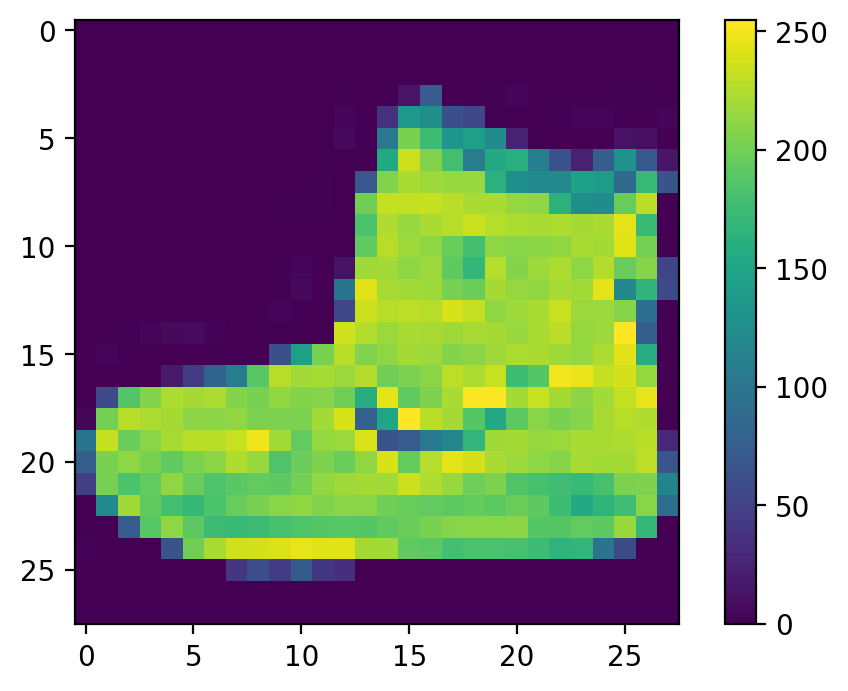

In [25]:
plt.imshow(train_images[0])
plt.colorbar()

In [26]:
train_images=train_images/255.0
test_images=test_images/255.0

In [27]:
def display_image_array(whichImg):    
    numcols=int(math.sqrt(len(whichImg)))
    if numcols*numcols < len(whichImg):
        numcols=numcols+1
    BigImage=np.zeros([28*numcols,28*numcols])
    for j in range(len(whichImg)):
        x=(j%numcols)*28
        y=int(j/numcols)*28
        BigImage[x:x+28,y:y+28]=train_images[whichImg[j]]
    plt.imshow(BigImage,interpolation='nearest', cmap='binary')
    plt.axis('off')
    plt.show()

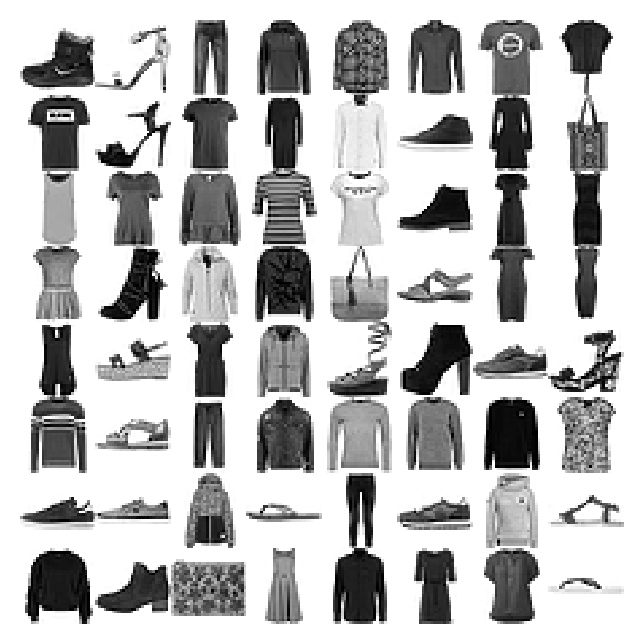

In [28]:
whichImg=range(64)
display_image_array(whichImg)

## Building our neural network

Now we will use Keras to build our neural network. 

### Set up the layers

A neural network is made up of layers and in the simple case these layers are applied sequentially.

In [33]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)
])

This model has three layers:
1. The first layer simply 'flattens' our 28x28 pixel image into a 1-dimensional array of length 784 (=28x28). (Despite all the fancy features most neural networks are at heart one-dimensional in temrs of input*** of course higher dimensionality can always be squesihed down to a larger single dimension). This layer has no paramters.
2. The second layer is fully connected (or *dense*) layer with 128 nodes. This layer has parameters.
3. The third layer is the output layer and has 10 nodes which correspond to the digits 0:9. This layer has parameters.

## From layers to a compiled model

Before we can train the model we need to determine the:
- *Loss function* - This is used to tell us how well our model is doing in
- *Optimiser* - This is how the model gets updated based on the data and the loss function
- *Metrics* - Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [34]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(lr=1.0),
              metrics=['accuracy'])

## Train the model
To train the model we need to show the training data to the model. In our case the training data is the `train_images` and `train_labels` arrays. The model will hopefully *learn* how to associate the images and the labels.

### Fitting the model to the data
The training process is also called fitting the model to the data (for obvious reasons). The Keras syntax for fitting the model uses `model.fit`

In [35]:
history=model.fit(train_images, train_labels,batch_size=100, epochs=30)

Epoch 1/30
600/600 [==============================] - 1s 995us/step - loss: 0.5547 - accuracy: 0.8107
Epoch 2/30
600/600 [==============================] - 1s 903us/step - loss: 0.4072 - accuracy: 0.8567
Epoch 3/30
600/600 [==============================] - 1s 935us/step - loss: 0.3659 - accuracy: 0.8693
Epoch 4/30
600/600 [==============================] - 1s 902us/step - loss: 0.3365 - accuracy: 0.8804
Epoch 5/30
600/600 [==============================] - 1s 907us/step - loss: 0.3195 - accuracy: 0.8847
Epoch 6/30
600/600 [==============================] - 1s 908us/step - loss: 0.3014 - accuracy: 0.8908
Epoch 7/30
600/600 [==============================] - 1s 918us/step - loss: 0.2900 - accuracy: 0.8940
Epoch 8/30
600/600 [==============================] - 1s 936us/step - loss: 0.2763 - accuracy: 0.8993
Epoch 9/30
600/600 [==============================] - 1s 953us/step - loss: 0.2661 - accuracy: 0.9020
Epoch 10/30
600/600 [==============================] - 1s 917us/step - loss: 0.259

In the above output you can see that the model improves the loss (this number gets smaller) and accuracy (this number gets bigger) with each epoch. But doing well on the training data set is a bit like marking your own homework. A fairer test is to evaluate the performance on the testing data set (which the model has not seen).

### Testing the performance

In [ ]:
print(np.shape(test_images))
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

#print('\nTest accuracy:', test_acc)

So when I ran this I found a accuracy on the training dataset of 98.11% but the accuracy on the testing datset was 97.10%. Perfroming better on the training than testing datset is an indication of overfitting (which will be dicussed in more detail later in the course).

## Predictions with probabilities
With our trained model we can now start trying to interogate the output probabilistically. We will make a new model with a *softmax* later to convert the linear outputs, [logits](https://developers.google.com/machine-learning/glossary#logits), to probabilities. N.B, We could have obtained the same by adding *softmax* activiation to the output layer in the original model definition. The *softmax* function is effectively taking an exponentiated unit function. So if the $i$th element of the *softmax* function $S(x)$ is $$ S(x)_i = \frac{e^{x_i}}{\sum_i e^{x_i}} $$


In [ ]:
prob_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [ ]:
#This function tests a range of the test images and returns an array of the predicted values
#and the associate probabilities for those predictions
def test_range(start,stop,dontprint=False):
    global test_images, test_labels
    global prob_model
    #Get an array of the predicted probabilities for each image in the range start-stop (not inclusive)
    predictions_probs=prob_model.predict(test_images[start:stop,:]) 
    #Find the biggest probability for each image (the index of the array matches the numbers for the MNIST)
    #axis =1 tells np.argmax which axis to loop over
    predictions=np.argmax(predictions_probs,axis=1)
    #Optional printing
    if dontprint==False:
        print("Predictions: ", predictions)
    true_labels=test_labels[start:stop]
    if dontprint==False:
        print("True labels: ", true_labels)
    if dontprint==False:
        print("Prediction Probabilities: ", predictions_probs)
    #
    return (predictions,predictions_probs)

In [ ]:
#Demonstrate the test_range function
_ = test_range(0,2)

The output of the test_range function is the list of predicted and true labels for the range. For each prediction the associated probability array is also printed.

In [ ]:
#This function shows the first maxnum mistakes in the testing dataset
def display_mistakes(maxnum):
    global test_images, test_labels
    (predictions, predictions_probs)=test_range(0,len(test_labels),dontprint=True)
    diff=test_labels-predictions
    count=0
    for j in range(len(test_labels)):
        if diff[j]!=0:
            if count<maxnum:
                count=count+1
                plt.imshow(test_images[j],interpolation='nearest', cmap='binary')
                plt.show()
                print("True ", test_labels[j], " - Predicted ", predictions[j], " with prob. ", predictions_probs[j,predictions[j]])
        

In [ ]:
display_mistakes(10)

## Interrograting the training
`keras.fit` returns a hitsory object that contains the evolution of the loss an accuracry metrics as a function of epoch. This allows us to see how quickly the fitting process is converging.

fig,ax=plt.subplots()
ax.plot(history.history['loss'], linewidth=3)
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

Text(0, 0.5, 'Accuracy')

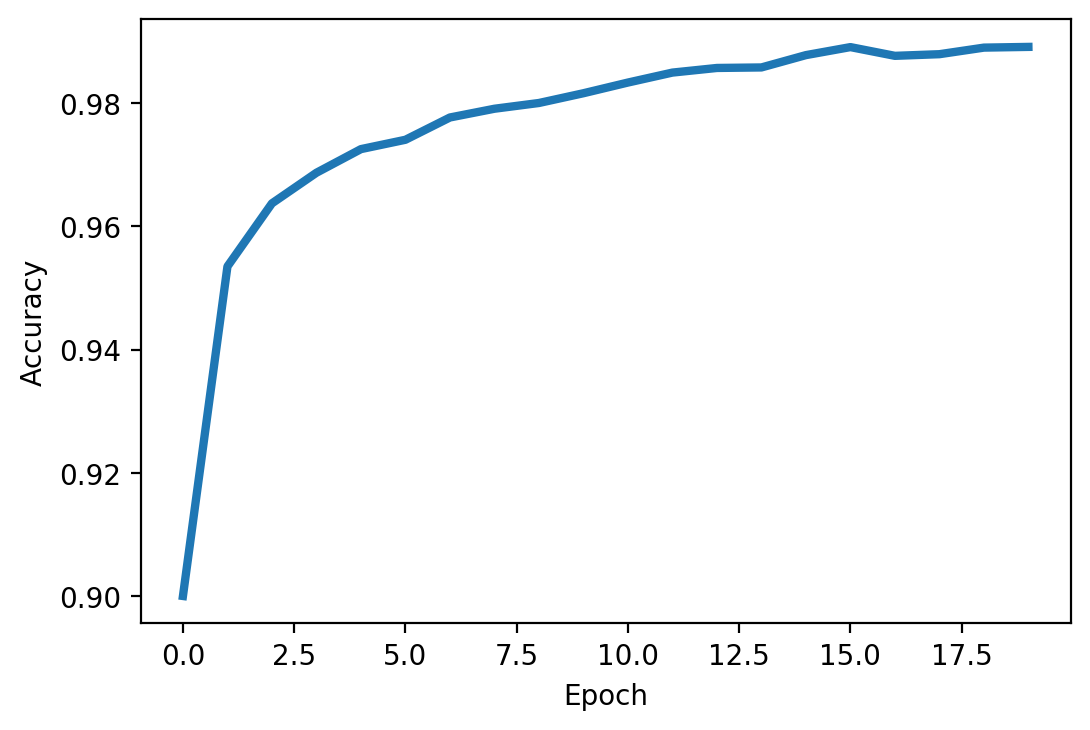

In [14]:
fig,ax=plt.subplots()
ax.plot(history.history['accuracy'], linewidth=3)
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")

# Further work
Now you can try and do different things with the keras network. Try and see if you can find a model that performs better on the training sample. Some possible optimisations include:
- Switching from the standard MNIST dataset to the fashion MNIST dataset to see if it is harder to try and indentify shoes and t-shirts rather than numbers
- Switching to a different optimisation routine (or changing the learning rate)
- Changing the network architechture (number of layers or size of each layer)
